## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [65]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,label_binarize,LabelBinarizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from plotnine import *
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report,roc_curve,auc,cohen_kappa_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read the data
df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
df= df.dropna()
df.head(1)

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [58]:
X = df[['age', 'chol']]
y = df['diagnosis']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
my_pipeline_log_regress = Pipeline([
    ("logreg", LogisticRegression())  # l1_ratio is required for elasticnet
])


In [61]:
# Fit the model
my_pipeline_log_regress.fit(X, y)

Pipeline(steps=[('logreg', LogisticRegression())])

In [62]:
# Extracting coefficients and intercept from the trained model
logreg_model = my_pipeline_log_regress.named_steps['logreg']
coef_age, coef_chol = logreg_model.coef_[0]  # Extract coefficients for 'age' and 'chol'
intercept = logreg_model.intercept_[0]

In [63]:
print(coef_age)
print(coef_chol)
print(intercept)

0.04686330613034962
0.0018012385190296785
-3.2401122588583937


In [79]:
age = 55 # Age of the individual for prediction

# Cholesterol level for 50% probability
chol_50_percent = -(intercept + coef_age * age) / coef_chol

# Cholesterol level for 90% probability
log_odds_90_percent = np.log(0.9 / 0.1)
chol_90_percent = -(intercept + coef_age * age - log_odds_90_percent) / coef_chol

print("Cholesterol level for 50% probability:", chol_50_percent)
print("Cholesterol level for 90% probability:", chol_90_percent)

Cholesterol level for 50% probability: 312.69527579220403
Cholesterol level for 90% probability: 912.7915824670783


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [80]:
# Define the pipeline
lda_pipeline = Pipeline([
    ("lda", LinearDiscriminantAnalysis())
])
lda_pipeline.fit(X, y)

Pipeline(steps=[('lda', LinearDiscriminantAnalysis())])

In [81]:
# After fitting, extract the coefficients and intercept from the LDA model within the pipeline
lda_model = lda_pipeline.named_steps['lda']
coef_agel, coef_choll = lda_model.coef_[0]
interceptl = lda_model.intercept_[0]

In [82]:
print(coef_agel)
print(coef_choll)
print(interceptl)

0.04655743553694484
0.0017896671039291314
-3.2196776604068784


In [83]:
# Calculate the cholesterol level at the decision boundary
chol_at_decision_boundary = -(interceptl + coef_agel * age) / coef_choll

print("Cholesterol level at the decision boundary:", chol_at_decision_boundary)

Cholesterol level at the decision boundary: 368.235357529938


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

- use a lienar classfier

Tune Parameter

In [66]:
# Define the pipeline
svc_pipeline = Pipeline([
    ("svc", SVC())
])

In [67]:
# Define the parameter grid for tuning
param_grid = {
    'svc__C': [0.1, 1, 10, 100]  # Example values for C
}

In [ ]:
# Create GridSearchCV object
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

In [73]:
cv_results = grid_search.cv_results_

model_scores = pd.DataFrame({'C': cv_results['param_svc__C'], 'mean_test_score': cv_results['mean_test_score']}).sort_values(by='mean_test_score', ascending=False)
model_scores.head()

,C,mean_test_score
3,100,0.637311
2,10,0.581818
0,0.1,0.558333
1,1,0.527462


In [84]:
svc_pipeline = Pipeline([
    ("svc", SVC(C=100, kernel='linear'))
])
svc_pipeline.fit(X, y)

Pipeline(steps=[('svc', SVC(C=100, kernel='linear'))])

In [95]:
svc_model = svc_pipeline.named_steps['svc']
coef_ages, coef_chols = svc_model.coef_[0]
intercepts = svc_model.intercept_[0]

In [96]:
print("Coefficient for age:", coef_ages)
print("Coefficient for chol:", coef_chols)
print("Intercept:", intercepts)

Coefficient for age: 0.06438964058179408
Coefficient for chol: 0.0036614532582461834
Intercept: -4.686349368386229


In [87]:
# Calculate the cholesterol level at the decision boundary (decision function = 0)
chol_at_decision_boundary = -(intercept + coef_age * age) / coef_chol

print("Cholesterol level at the decision boundary:", chol_at_decision_boundary)

Cholesterol level at the decision boundary: 312.69527579220403


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

I need to get the lines into the y=mx+b format to graph the line

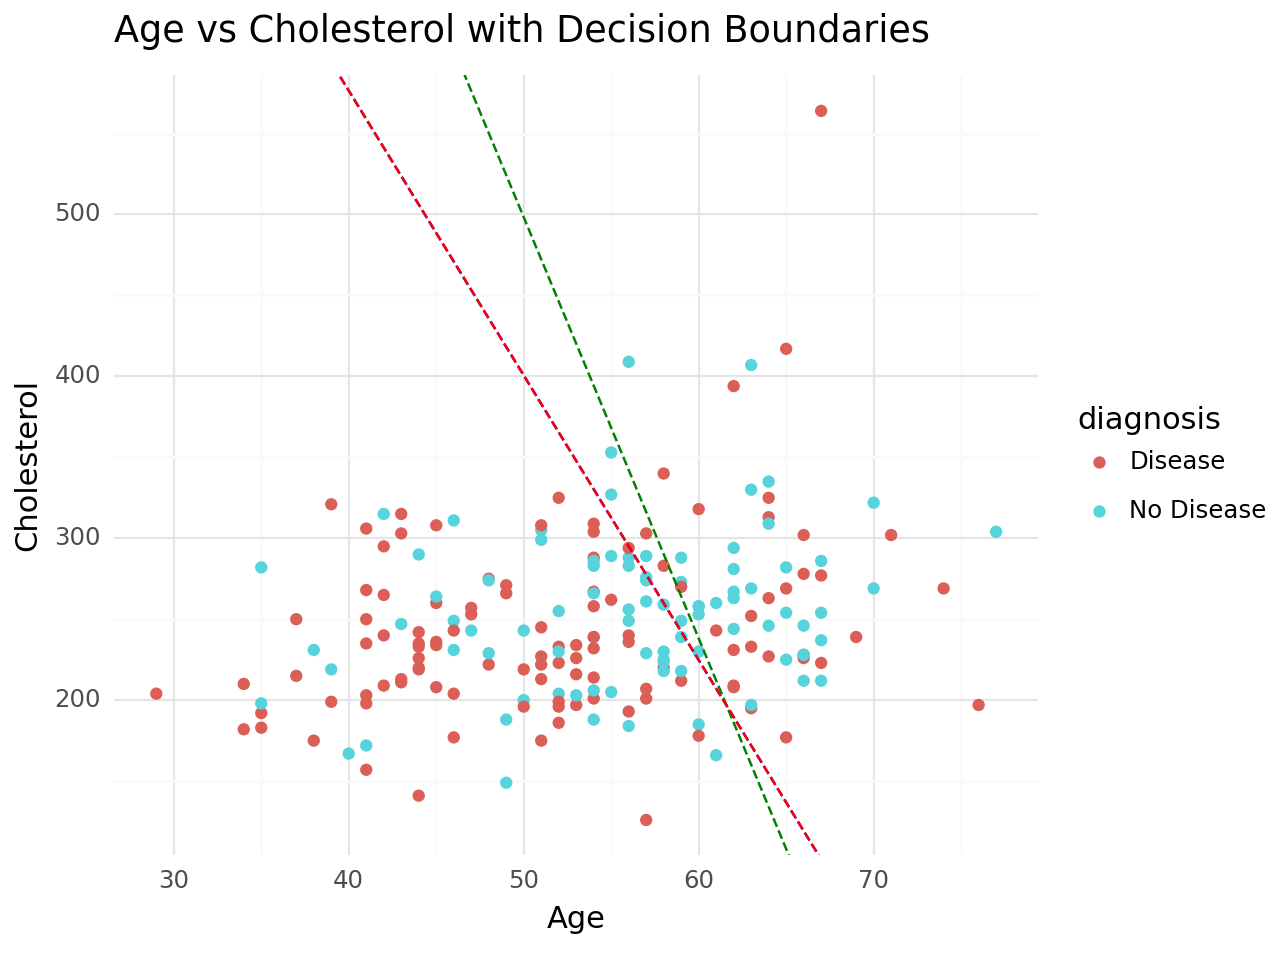

<Figure Size: (640 x 480)>

In [113]:
# Create the scatter plot
plot = (ggplot(df, aes(x='age', y='chol', color='diagnosis'))
        + geom_point()
        + labs(title='Age vs Cholesterol with Decision Boundaries', x='Age', y='Cholesterol')
        + theme_minimal())

# Add decision boundaries using geom_abline
# Logistic Regression Decision Boundary
slope_logreg = -coef_age / coef_chol
intercept_logreg_plot = -intercept / coef_chol
plot += geom_abline(slope=slope_logreg, intercept=intercept_logreg_plot, color='blue', linetype='dashed')

# LDA Decision Boundary
slope_lda = -coef_agel / coef_choll
intercept_lda_plot = -interceptl / coef_choll
plot += geom_abline(slope=slope_lda, intercept=intercept_lda_plot, color='green', linetype='dashed')

# SVC Decision Boundary
slope_svc = -coef_ages / coef_chols
intercept_svc_plot = -intercepts / coef_chols
plot += geom_abline(slope=slope_svc, intercept=intercept_svc_plot, color='red', linetype='dashed')


# Display the plot
plot
